In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise:

1) Choose a given type of ecological structure (e.g. mutualistic, or predator-prey, or etc...). Generate random matrices with for completely random and for the chosen ecological structures. You need to create SxS matrices (S is the number of species) with C non-zero entries and 1-C zeros (C is the connectivity between 0 and 1). The non-zero elements are drawn at random from given distributions. Depending on the network structure some symmetries and constraints may hold. Please follow the detailed step-by-step explanation in the "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf" (Also uploaded in the Google Drive, note folder). fix C and for S=20, 50, 100, 200 calculate the eigenvalues of the matrix and plot them against Real part (x-axis) and imaginary part (y-axis).

3) For case 2) plot the maximum real part eigenvalues for each S (Max Re lambda as a function of S) and the probability of P(lambda >0) as a function of the proper control parameter (e.g. for the complete random case is sigma*(S*C)^0.5. Compare these plots with the one for the complete random case (the original May case).


#### I chose mutualistic ecological structure.


From "Homework-detail-week3-from-Allesina-Stability-Criteria-2012-Nature.pdf":

### Random matrices
In the random case, we construct the matrices in the following way:

i) For each off-diagonal coefficient $M_{ij},i \neq j$, we draw a random value $p$ from a uniform distribution $U[0, 1].$

ii) If the value is $p \leq C$, we set coefficient $M_{ij}$ by sampling it from $N(0, \sigma^2)$.

iii) Otherwise $(p>C), M_{ij} = 0$.

iv) All diagonal terms, $M_{ii}$, are set to $−d$.

### Mutualistic matrices
i) For each pair of interactions $(M_{ij}, M_{ji}) i>j$, we draw a random value $p$ from a uniform distribution $U[0, 1]$.

ii) If $p \leq C$, we draw $M_{ij}$ and $M_{ji}$ independently from a half-normal distribution

$|N(0, \sigma^2)|$.

iii) If $p>C$, we assign 0 to both $M_{ij}$ and $M_{ji}$.

iv) All diagonal terms, $M_{ii}$, are set to $−d$.


### 1)

In [2]:
def random_matrix(S, sigma, d, C):
    
    rm = np.zeros((S, S))
    
    for i in range(S):
        for j in range(S):
            
            if i == j: rm[i][j] = -d
                
            else:
                p = np.random.uniform()
                
                if p <= C: rm[i][j] = np.random.normal(0, sigma)
                    
                else: rm[i][j] = 0
    
    return rm

In [3]:
def mutualistic_matrix(S, sigma, d, C):
    
    mm = np.zeros((S, S))
    
    for i in range(S):

        for j in range(i+1):
            
            if i == j: mm[i][j] = -d
                
            else:
                p = np.random.uniform()
                
                if p <= C:
                    
                    mm[i][j] = np.abs(np.random.normal(0, sigma))
                    mm[j][i] = np.abs(np.random.normal(0, sigma))
                    
                else:
                    
                    mm[i][j] = 0
                    mm[j][i] = 0
    
    return mm

In [4]:
C = 0.6
d = 0.7
sigma = 0.1

S20_r = random_matrix(20, sigma, d, C)
S50_r = random_matrix(50, sigma, d, C)
S100_r = random_matrix(100, sigma, d, C)
S200_r = random_matrix(200, sigma, d, C)


S20_m = mutualistic_matrix(20, sigma, d, C)
S50_m = mutualistic_matrix(50, sigma, d, C)
S100_m = mutualistic_matrix(100, sigma, d, C)
S200_m = mutualistic_matrix(200, sigma, d, C)

In [5]:
def find_eigenvalues(m):
    
    eigenvalues, _ = np.linalg.eig(m)
    
    y = eigenvalues.imag
    x = eigenvalues.real
    
    return x, y


def plot_eigenvalues(m1, m2, m3, m4, case, color1, color2, color3, color4):
    
    x1, y1 = find_eigenvalues(m1)
    x2, y2 = find_eigenvalues(m2)
    x3, y3 = find_eigenvalues(m3)
    x4, y4 = find_eigenvalues(m4)
    
    
    figure, axis = plt.subplots(2, 2, figsize=(10,10)) 
   
    axis[0, 0].scatter(x1, y1, color = color1) 
    axis[0, 0].set_title(str("S = ") + str(len(m1)))
    axis[0, 0].set_xlabel("Re($\lambda$)", fontsize = 12)
    axis[0, 0].set_ylabel("Im($\lambda$)", fontsize = 12)
    axis[0, 0].set_xlim(min(x1)-0.1, max(x1)+0.1)
    axis[0, 0].set_ylim(min(y1)-0.1, max(y1)+0.1)
    

    axis[0, 1].scatter(x2, y2, color = color2) 
    axis[0, 1].set_title(str("S = ") + str(len(m2)))
    axis[0, 1].set_xlabel("Re($\lambda$)", fontsize = 12)
    axis[0, 1].set_ylabel("Im($\lambda$)", fontsize = 12)
    axis[0, 1].set_xlim(min(x2)-0.1, max(x2)+0.1)
    axis[0, 1].set_ylim(min(y2)-0.1, max(y2)+0.1)
    
    
    axis[1, 0].scatter(x3, y3, color = color3) 
    axis[1, 0].set_title(str("S = ") + str(len(m3)))
    axis[1, 0].set_xlabel("Re($\lambda$)", fontsize = 12)
    axis[1, 0].set_ylabel("Im($\lambda$)", fontsize = 12)
    axis[1, 0].set_xlim(min(x3)-0.1, max(x3)+0.1)
    axis[1, 0].set_ylim(min(y3)-0.1, max(y3)+0.1)
    
    
    axis[1, 1].scatter(x4, y4, color = color4) 
    axis[1, 1].set_title(str("S = ") + str(len(m4)))
    axis[1, 1].set_xlabel("Re($\lambda$)", fontsize = 12)
    axis[1, 1].set_ylabel("Im($\lambda$)", fontsize = 12)
    axis[1, 1].set_xlim(min(x4)-0.2, max(x4)+0.2)
    axis[1, 1].set_ylim(min(y4)-0.2, max(y4)+0.2)
    
    
    figure.suptitle(case, fontsize = 16)

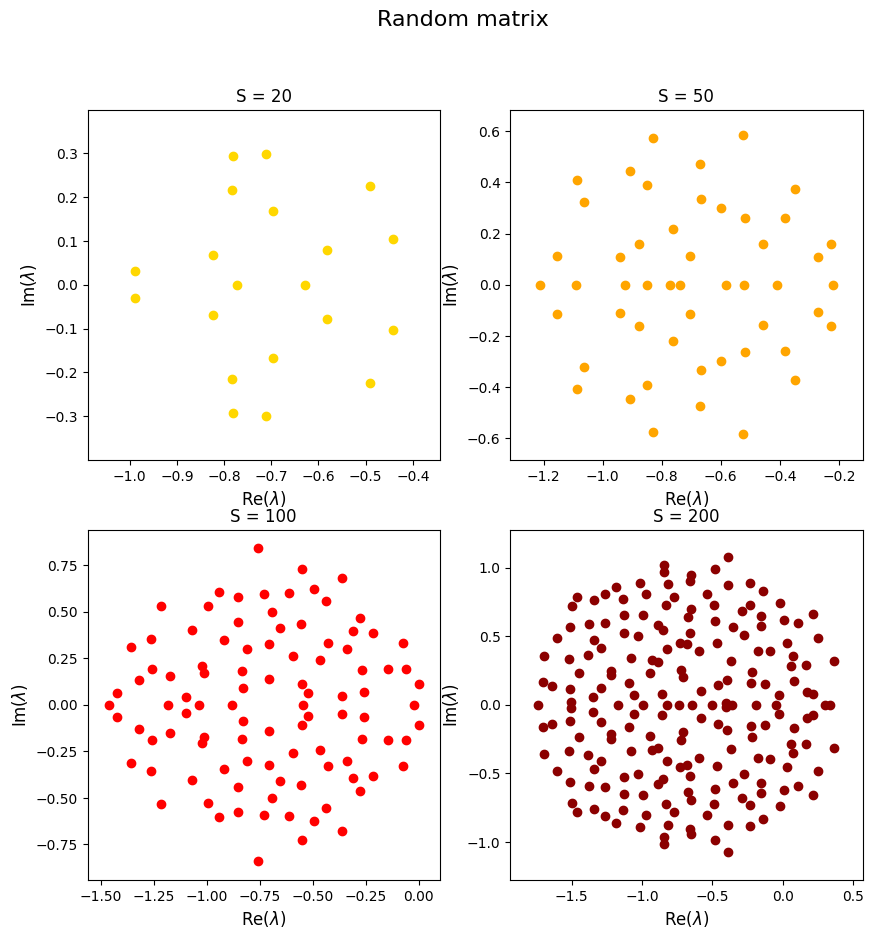

In [6]:
plot_eigenvalues(S20_r, S50_r, S100_r, S200_r, "Random matrix", 'gold', 'orange', 'red', 'darkred')

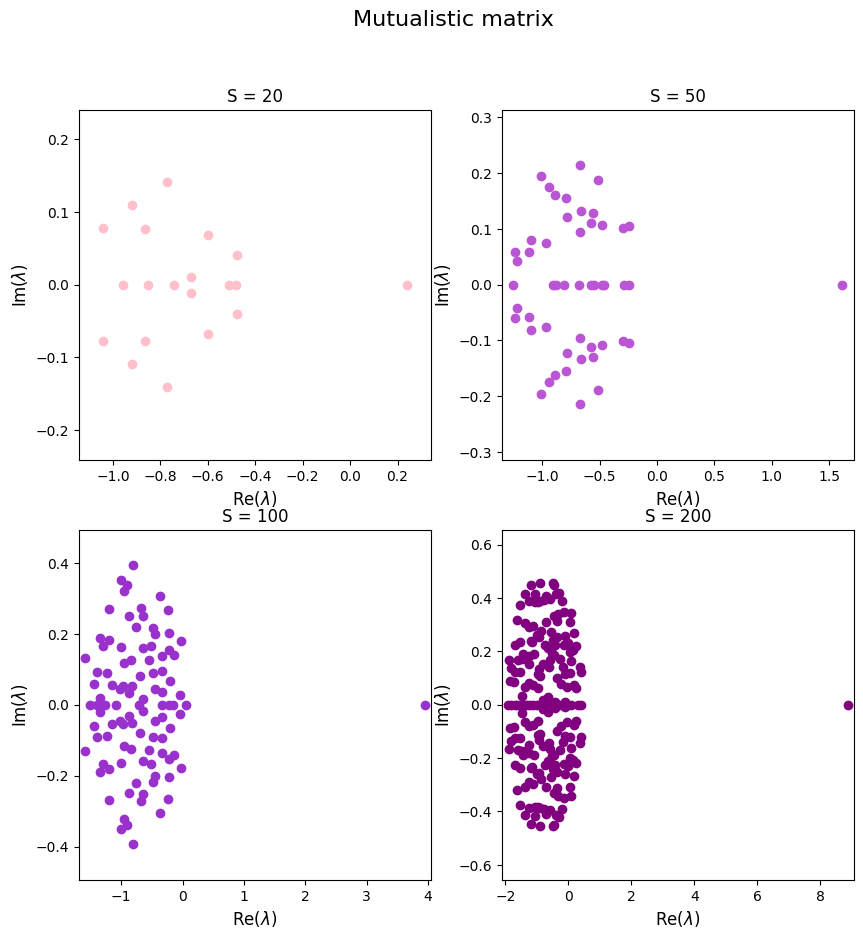

In [7]:
plot_eigenvalues(S20_m, S50_m, S100_m, S200_m, "Mutualistic matrix", 'pink', 'mediumorchid', 'darkorchid', 'purple')

As it can be seen from the plots, in a random case the eigenvalues lie within a circle, while for the mutualistic case all eigenvalues lie within the striched over y-axis ellipse, except one outlier, which destabilises the system.

### 2)

In [8]:
def max_real_eigenvalue(m):
    
    eigenvalues, _ = np.linalg.eig(m)
    
    return max(eigenvalues.real)

In [9]:
S = np.array([20, 50, 100, 200], dtype=int)
matrix_random = [S20_r, S50_r, S100_r, S200_r]
matrix_mutual = [S20_m, S50_m, S100_m, S200_m]

max_lambda_random = np.zeros(len(S))
max_lambda_mutualistic = np.zeros(len(S))

for i in range(len(S)):
    
    max_lambda_random[i] = max_real_eigenvalue(matrix_random[i])
    max_lambda_mutualistic[i] = max_real_eigenvalue(matrix_mutual[i])

(15.0, 205.0)

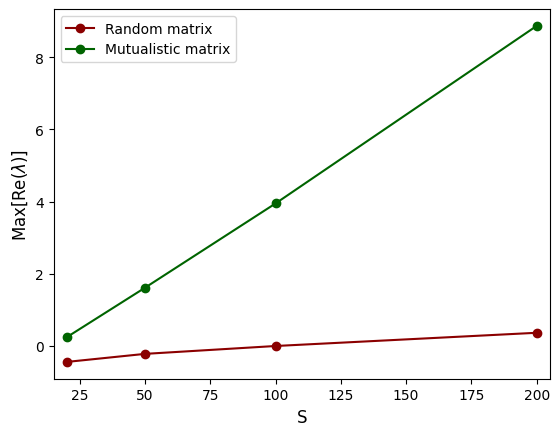

In [10]:
plt.plot(S, max_lambda_random, color='darkred', marker='o')
plt.plot(S, max_lambda_mutualistic, color='darkgreen', marker='o')
plt.legend(['Random matrix', 'Mutualistic matrix'])
plt.xlabel("S", fontsize=12)
plt.ylabel("Max[Re($\lambda$)]", fontsize=12)
plt.xlim(15, 205)

We can see also in this plot that mutualistic case is less stable compared to the random case.

To plot the probability of P(lambda >0) as a function of the proper control parameter, for mutualistic case we need to find the parameter using this expression:

$max(\sqrt{SC[\sigma^2 + (1-C)\mu^2]}- C\mu, \; (S-1)C\mu)$.


For the complete random it equals to $\sigma\sqrt{SC}$.

The probability of lambda>0 I find as the fraction of eigenvalues that have a real part bigger than zero.

In [11]:
def prob(m):
    x, _ = find_eigenvalues(m)
    count = 0
    for i in range(len(m)):
        if x[i] > 0: count+=1
    return count/len(x)



def find_mu(m):
    sums = np.zeros(len(m))
    
    for j in range(len(m)):
        sums[j] = np.sum(m[j])
    
    mu = np.sum(sums)/len(m)
    return mu


def find_control_param(C, sigma, m):
    mu = find_mu(m)
    
    param = np.zeros(2)
    
    param[0] = np.sqrt( len(m)*C*(sigma**2 + (1-C)*mu) ) - C*mu
    param[1] = (len(m) - 1)*C*mu
    
    return max(param)

In [12]:
control_param_random = np.sqrt(S*C)*sigma
control_param_mutual = np.zeros(len(S))

prob_random = np.zeros(len(S))
prob_mutual = np.zeros(len(S))

for i in range(len(S)):
    control_param_mutual[i] = find_control_param(C, sigma, matrix_mutual[i])
    prob_mutual[i] = prob(matrix_mutual[i])
    prob_random[i] = prob(matrix_random[i])

Text(0.5, 1.0, 'Random case')

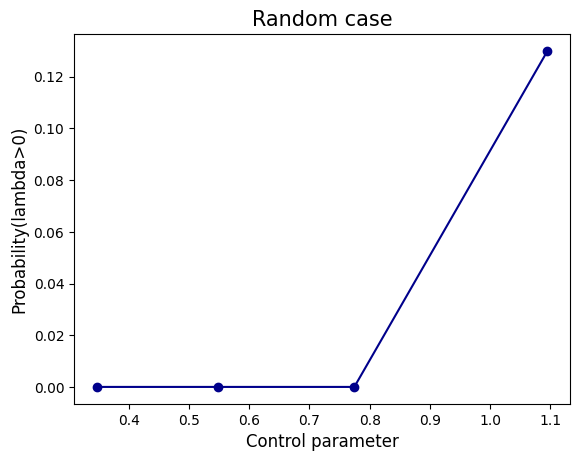

In [13]:
plt.plot(control_param_random, prob_random, marker='o', color='darkblue')
plt.xlabel("Control parameter", fontsize=12)
plt.ylabel("Probability(lambda>0)", fontsize=12)
plt.title("Random case", fontsize=15)

Control parameter should be less than d (in my case 0.7) in order for the system to be stable. As we can see, results follow the rule: the larger the system, less stable it is. From S=100 the system becomes unstable. We also see how increases the probability of having lambda>0 with S (since only S changes in the control parameter's expression).

Text(0.5, 1.0, 'Mutualistic case')

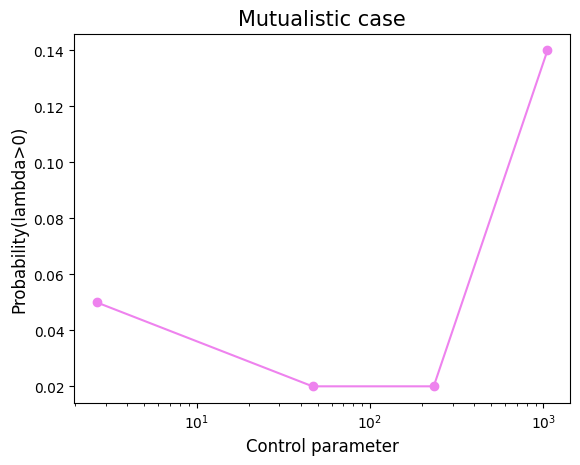

In [14]:
plt.plot(control_param_mutual, prob_mutual, marker='o', color="violet")
plt.xscale("log")
plt.xlabel("Control parameter", fontsize=12)
plt.ylabel("Probability(lambda>0)", fontsize=12)
plt.title("Mutualistic case", fontsize=15)

In [15]:
control_param_mutual[0]

2.6547665723008627

Here because of the outlier, that destabilises the system, even the case with S=20 is unstable.

We can see that the probability of having lambda>0 is not big and actually drops for S=50, however after this the trend remains the same as in the case before, so that probability increases with control parameter.